In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np 
import os


for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
train = pd.read_csv("./Data/train.csv")
test = pd.read_csv("./Data/test.csv")

labels = train.pop('target')
train_id = train.pop("id")
test_id = test.pop("id")

In [3]:
print(train.shape)
print(test.shape)

(300000, 23)
(200000, 23)


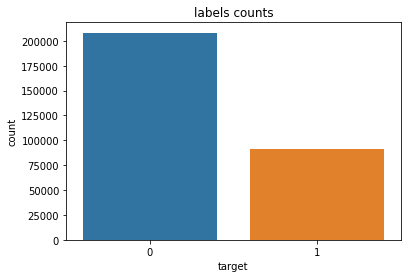

In [4]:
sns.countplot(labels)
plt.title("labels counts")
plt.show()

In [5]:
def count_plot(data, columns):
    
    fig, axes = plt.subplots(nrows=len(columns), figsize=(10,10))
    fig.subplots_adjust(hspace=0.3)

    for (i, col) in enumerate(columns):
        sns.countplot(data[col], ax=axes[i])
        axes[i].set_xlabel(None)
        axes[i].set_ylabel("count " + str(col), fontsize=12)
    
    plt.show()

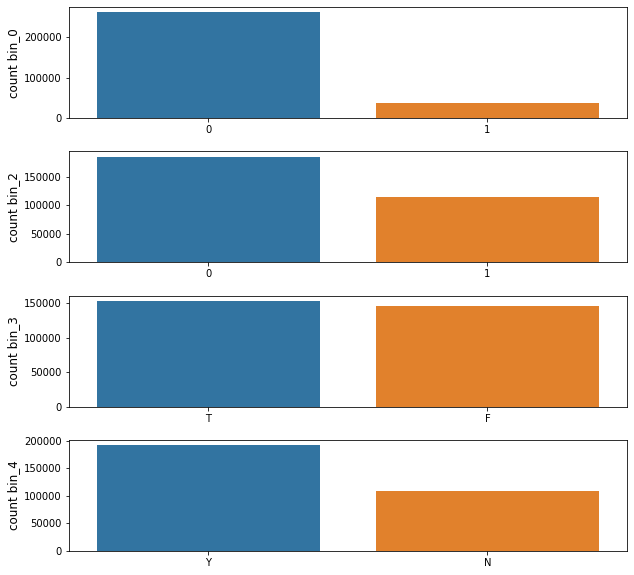

In [6]:
bin_col = ['bin_0', 'bin_2', 'bin_3', 'bin_4']

count_plot(train, bin_col)

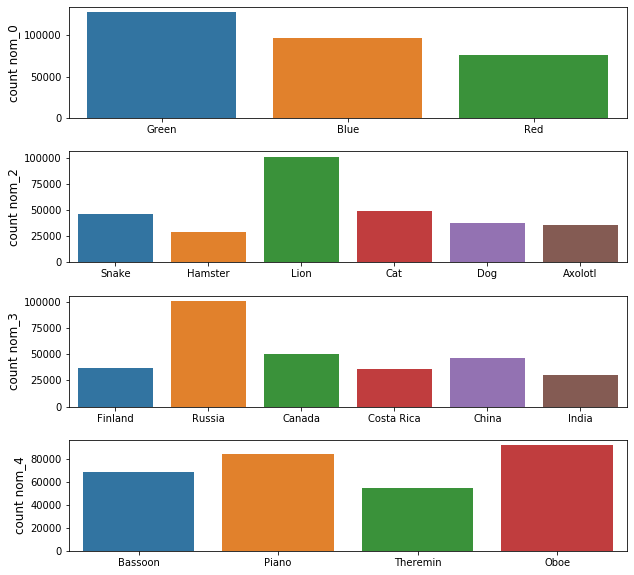

In [7]:
nom_col = ['nom_0', 'nom_2', 'nom_3', 'nom_4']

count_plot(train, nom_col)

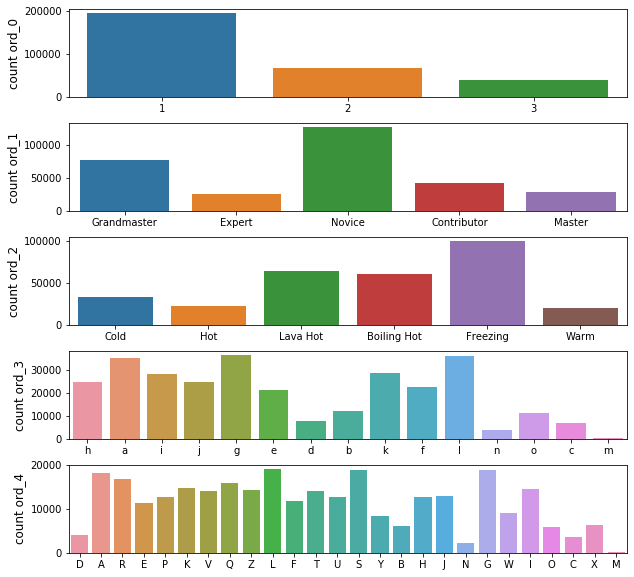

In [8]:
ord_col = ['ord_0', 'ord_1', 'ord_2', 'ord_3', 'ord_4']

count_plot(train, ord_col)

In [9]:
labels = labels.values

In [10]:
data = pd.concat([train, test])

In [11]:
data["ord_5a"] = data["ord_5"].str[0]
data["ord_5b"] = data["ord_5"].str[1]

In [12]:
data.drop(["bin_0", "ord_5"], axis=1, inplace=True)

In [13]:
columns = [i for i in data.columns]

dummies = pd.get_dummies(data,
                         columns=columns,
                         drop_first=True,
                         sparse=True)

del data

In [14]:
train = dummies.iloc[:train.shape[0], :]
test = dummies.iloc[train.shape[0]:, :]

del dummies

In [15]:
print(train.shape)
print(test.shape)

(300000, 16438)
(200000, 16438)


In [16]:
train = train.sparse.to_coo().tocsr()
test = test.sparse.to_coo().tocsr()

train = train.astype("float32")
test = test.astype("float32")

In [17]:
lr = LogisticRegression(C=0.1338,
                        solver="lbfgs",
                        tol=0.0003,
                        max_iter=5000)

lr.fit(train, labels)

lr_pred = lr.predict_proba(train)[:, 1]
score = roc_auc_score(labels, lr_pred)

print("score: ", score)

score:  0.8284135463297031
